# Adattisztítás és integráció

A valós adathalmazok gyakran zajosak, hiányosak, avagy éppen redundáns információt vagy duplikátum egyedeket tartalmaznak. Ezért a tudásfeltárás folyamatában az adattisztítás és adatintegrálással kezdődik.

Az adattisztítás szerepe javítani az adatok minőségén azáltal, hogy kiszűri és eltávolítja az adatokban fellépő hibákat és inkonzisztenciákat.

Az [adattisztítás](https://hu.wikipedia.org/wiki/Adattiszt%C3%ADtás) során:
- felmérjük a hibákat
	- ellenőrizzük az adatfájl szerkezeti épségét
	- a zajt, felesleges információt tartalmazó mezőket javítjuk
	- felmérjük a hiányzó értékeket és amennyiben lehet ezeket pótoljuk
	- felmérjük az adatközlési és adatbeviteli hibákat
		- megvizsgáljuk az egyes változók eloszlását
			- az eloszlások szélein elhelyezkedő extrém értékeket ellenőrizzük
			- felmérjük, hogy az eloszlások megfelelnek-e az előzetes elvárásainknak, vannak-e nem várt sűrűsödések, ritkulások egyes értéktartományokban (például durva kerekítés vagy eltérő mértékegység használata az adatszolgáltatók egy részénél)
		-  megvizsgáljuk, hogy a változók közötti triviális összefüggések teljesülnek-e
-  a hibásnak tűnő adatokat felülvizsgáljuk, javítjuk.

# Feladatok

Az adatok letöltésére használjuk a `requests` könyvtárat. A requests könyvtár lehetővé teszi, hogy az internetről HTTPS protokollal bármilyen állományt letöltsünk, beleértve HTML dokumentumokat is. Sokszor megtörténhet, hogy az adatokat egy weboldalról kell letöltenünk, majd tisztítanunk valamely módon.

A HTML-es adatok feldolgozására használjuk a `BeautifulSoup4` könyvtárat. A `BeautifulSoup4` könyvtár segítségével fel tudjuk dolgozni a HTML adatokat. A könyvtár lehetővé teszi, hogy betöltsük a memóriába a HTML-ből vett struktúrákat, és általánosan tudjunk benne keresni elemeket, kiolvasni attribútumokat, stb.

1. A requests, BeautifulSoup4, plotly és nbformat könyvtárak nem képezik részét a Python standard könyvtárkészletének. Töltsük le a pip package managerrel ezeket a könyvtárakat.

In [ ]:
!python -m pip install requests beautifulsoup4 plotly nbformat --upgrade --user

## Amerikai egyetemek

1. Az `egyetemek.txt` fájlból szűrjük ki az államokat és azon belül a városokat, melyben egyetemek találhatóak. Ha vannak duplikátumok, helytelen adatok (pl. számokat tartalmazó államnév), ezeket javítsuk. Vizsgáljuk meg az egyetemek eloszlását államok szerint.

2. Melyik államban van a legtöbb, legkevesebb egyetem?

3. Bővítsük ki az adatbázisunkat egy oszloppal, mely tartalmazza az államok rövidítését is (pl. Texas - TX, California - CA stb.).  [Forrás](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations).

In [1]:
# Importáljuk a könyvtárakat
import pandas as pd
import requests
import bs4

# Álcázzuk magunkat egy webböngészőnek
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
headers = {'User-Agent': user_agent}

url = 'https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations'

# Töltsük le a weboldalt
with requests.get(url, headers=headers) as req:
    # Ha nem sikerült a letöltés, akkor hibát dobunk
    req.raise_for_status()

    # A letöltött HTML-t lementjük egy változóba
    html_data = req.text

In [3]:
# A BeautifulSoup segítségével dolgozzuk fel a letöltött HTML-t
soup = bs4.BeautifulSoup(html_data, features='html.parser')

# Keresük meg az oldalon azt a táblázatot, aminek az osztálya 'wikitable sortable'
table = soup.find('table', {'class': 'wikitable sortable'})

# A táblázatban keressük meg a sorokat
table_rows = table.find_all('tr')

# Ide fogjuk menteni az államok nevét és rövidítését
states = []
abbreviations = []

for table_row in table_rows:
    # A sorokon belül keressük meg az oszlopokat
    table_cols = table_row.find_all('td')

    # Ha az oszlopok száma 10, akkor egy államról van szó
    if len(table_cols) == 10:
        # Az állam neve a 0. oszlopban található
        state = table_cols[0].text

        # Az állam rövidítése a 3. oszlopban található
        abbreviation = table_cols[3].text

        if not abbreviation:
            # Ha nincs rövidítése az államnak, akkor a következő sorra ugrunk
            continue

        states.append(state)
        abbreviations.append(abbreviation)

# Hozzuk létre a DataFrame-et
state_abbreviations = pd.DataFrame({'state': states, 'abbreviation': abbreviations})
state_abbreviations

,state,abbreviation
0,United States of America,US
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR
5,California,CA
6,Colorado,CO
7,Connecticut,CT
8,Delaware,DE
9,District of Columbia,DC


4. Hasonlóan, a [List of U.S. states and territories by area](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area) linken szereplő területi adatokat is integráljuk be a datasetünkbe.

5. Számoljuk ki államonként átlagban hány négyzetkilométerre jut egy egyetemi város.

6. Az ábrán a kivitel (exportmennyiség) van ábrázolva az Amerikai Egyesült Államok térképen, államonként lebontva. Készítsünk hasonló ábrákat az egyetemek eloszlásáról is. A [térképen való ábrázolás](https://plotly.com/python/maps/) Plotly segítségével történhet.

In [4]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

fig = go.Figure(data=go.Choropleth(
	locations=df['code'], # államok kódja, 
	z = df['total exports'].astype(float), # adat, amit színezni akarunk
	locationmode = 'USA-states', 
	colorscale = 'Reds',
	colorbar_title = 'Millions USD'
))
fig.update_layout(
	title_text = '2011 US Agriculture Exports by State',
	geo_scope='usa' # csak az USA-t jelenítsük meg
)
fig.show()

## Vásárhelyi éttermek

Keressük meg Vásárhelyen a legolcsóbb és legdrágább pizzákat. A pizzákat keressük meg az [eeatingh.ro](https://eeatingh.ro) oldalán. Az [eeatingh.ro](https://eeatingh.ro) oldalon több étterem található, mindegyik étterem közzé teszi a saját menüjét.

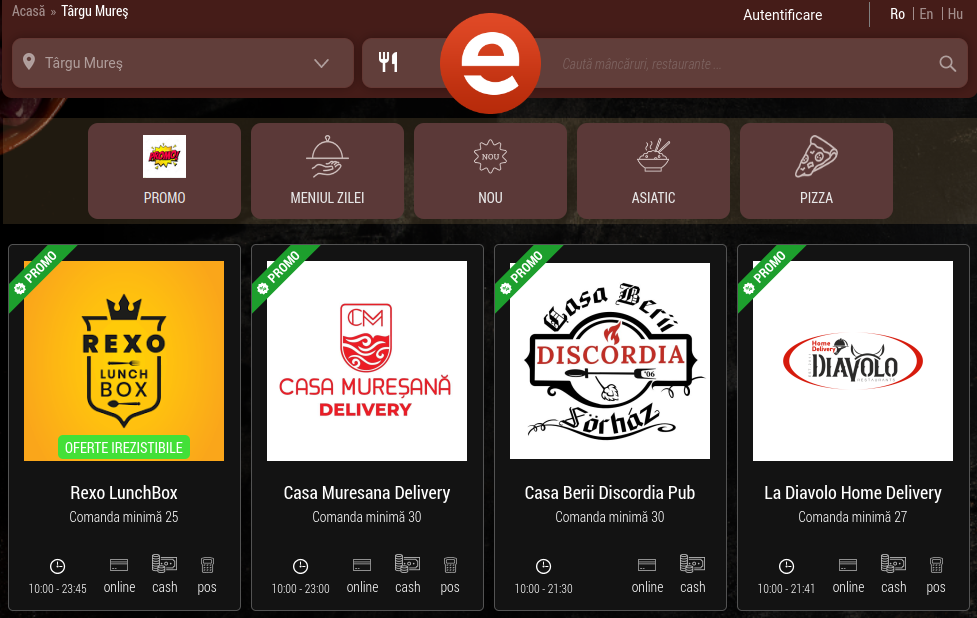

1. Használjuk a requests könyvtárat, hogy letöltsük az éttermek listáját a főoldalról. Mentsük le az éttermek nevét (például: Rexo LunchBox), illetve az étteremhez tartozó adatlap elérhetőségét (például: `https://eeatingh.ro/targu-mures/rexo-lunchbox.html`) egy DataFramebe. Mentsük ki a DataFrame-et egy állományba, hogy később gyorsabban lehessen az adatokat feldolgozni!

Segítség: Használjuk a Chrome-ban a beépített `Inspect Element` funkcionalitást. Keressük meg a HTML dokumentumban, hogy hol vannak lementve az éttermek. Minden éttermet külön entitásnak tekinthetünk. Kerssük meg, hogy egy éttermen belül hol van lementve az étterem neve, illetve az étteremhez tartozó adatlap elérhetősége. Ezeket az információkat használjuk fel arra, hogy megírjuk a HTML feldolgozását a BeautifulSoup4 segítségével.

2. Éttermenként töltsük le a vendeglők adatlapját. Az étterem adatlapján megtalálható az adott vendéglő menüje. Haladjunk végig az összes éttermen, töltsük le őket, és keressük ki a rendelhető fogásokat. Mentsük le az ételek / italok nevét, árát és leírását, illetve az étterem nevét, ahol rendelni lehet őket. Ezeket az információkat mentsük ki egy DataFrame-be. Mentsük ki a DataFrame-et egy állományba, hogy később gyorsabban lehessen az adatokat feldolgozni!

Segítség: Mindegyik rendelhető étel felfogható egy külön entitásként. A rendelhető ételek egy-egy div-nek felelnek meg a HTML forrásállományban. Használjuk a Chrome `Inspect Element` funkcionalitását, hogy találjuk meg azt az attribútumot, amivel ki lehet szűrni a rendelhető fogásokat. Az étel nevét és árát ugyancsak ki lehet szedni egy-egy HTML elemből.

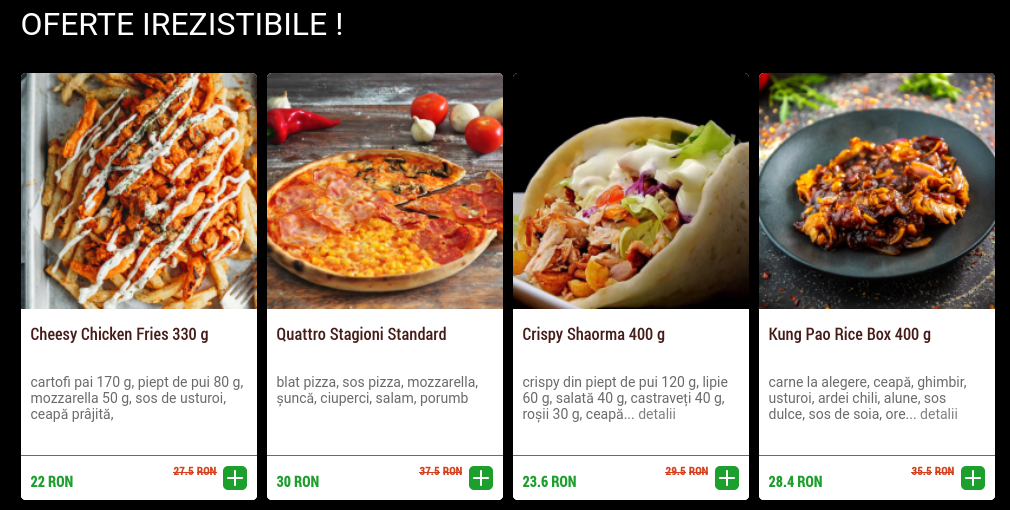

3. Keressük meg az összes olyan ételt, aminek a leírásában megtalálható a `pizza` szócska. Ezeket az ételeket rendezzük növekvő sorrendbe az áruk alapján. Másnéven: keressük meg Vásárhelyen a legolcsóbb és legdrágább pizzákat.

4. Keressük meg az összes olyan ételt, ami 30 lej alatt megrendelhető.

5. Melyik a legdrágább étel az oldalon?

6. Melyik étteremnek van a legnagyobb kínálata?

7. Számoljuk ki vendéglőnként az ételek átlag árát! Melyik étterem a legdrágább / legolcsóbb?